In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import pandas as pd

In [5]:
# Default plot parameters
font = {'weight' : 'normal',
        'size'   : 20}

rc('font', **font)
legend_fs = 16

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.gnuplot2(np.linspace(0,1,N)))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['image.cmap'] = 'inferno'
cmap = cm.get_cmap('inferno')


C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\3302853007.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno')


In [6]:
# Data directories 
folderA = "Raw_data/profilometry_waferA"
folderB = "Raw_data/profilometry_waferB"

# Masses applied with the stylus (mg)
forces_waferA = np.arange(1, 16, 1) 
forces_waferB = np.arange(1, 16, 2)        

# Convert to force (muN)
forces_newtons_waferA = 9.8*forces_waferA   
forces_newtons_waferB = 9.8*forces_waferB  

# Membrane indices
mem_idx = [11, 12, 13, 21, 22, 23, 31, 32, 33]
wrong_idx = [11, 12, 13, 21, 22, 23, 11, 12, 13]    # mislabeled data
data = []
peaks = []

def center_profile(data):
    """
    Centers linescan at the midpoint between membrane edges (where membrane starts to bend)
    """
    y = 1e-4*np.abs(data.iloc[:,1])         # Convert from Angstrom to um 
    y_neg = np.where(y>0.10*np.max(y))[0]   # Find all points where surface is bent
    x_shift = (data.iloc[int(y_neg[-1]),0] + data.iloc[int(y_neg[0]),0]) / 2    # x-shift necessary to center profile
    data.iloc[:,0] -= float(x_shift)

    return data, x_shift

def process_profile_data(folder, mem_idxs, forces, rev_format=False):
    """
    Extracts all relevant information from the (forward & reverse) profilometry scans including: 
        - Maximum deflections max(\phi)
        - Membrane widths w_b

    Arguments: 
        - mem_idxs :    membrane indices (array)
        - forces :      forces applied to the membranes in muN (array)
    """
    
    result = {}
    rev_idxs = [1, 5, 10]
    for jj, idx in enumerate(mem_idxs):
        result[f"Mem {jj}"] = {
            "Data" : {"Forward" : [], "Reverse": []}, 
            "Peaks" : {"Forward" : [], "Reverse": []},
            "Widths" : {"Forward" : [], "Reverse": []}, 
            }
        for ii, n in enumerate(forces):
            filename = folder + "/%i/%i_%img.csv" % (mem_idx[jj],idx,n)
            result[f"Mem {jj}"]["Data"]["Forward"].append(pd.read_csv(filename, skiprows=23))
            data = result[f"Mem {jj}"]["Data"]["Forward"][ii]
            if ii==0: 
                _ , data_optimum = center_profile(data)     # Only calculate centering shift once per membrane
            else:
                data.iloc[:,0] = data.iloc[:,0] - data_optimum
            result[f"Mem {jj}"]["Peaks"]["Forward"].append(np.max(-data.iloc[:,1]))

        for kk, rev_idx in enumerate(rev_idxs):
            if rev_format:   # Slightly different file naming conventions between wafers
                # Wafer A
                filename = folder + "/%i/%i_rev_%img.csv" % (mem_idx[jj],idx,rev_idx)
            else:
                # Wafer B
                filename = folder + "/%i/%i_%img_r.csv" % (mem_idx[jj],idx,rev_idx)

            result[f"Mem {jj}"]["Data"]["Reverse"].append(pd.read_csv(filename, skiprows=23))
            data = result[f"Mem {jj}"]["Data"]["Reverse"][kk]
            data.iloc[:,0] = data.iloc[:,0] - data_optimum
        
        # Calculate membrane width similar to how centering shift is applied
        x_pos = np.array(result[f"Mem {jj}"]["Data"]["Forward"][-1].iloc[:,0])
        y = 1e-4*result[f"Mem {jj}"]["Data"]["Forward"][-1].iloc[:,1]
        y_neg = np.where(y<-5e-3)[0]
        result[f"Mem {jj}"]["Widths"]["Forward"].append(
            x_pos[y_neg[-1]] - x_pos[y_neg[0]]
        )

    return result

result_waferA = process_profile_data(folderA, wrong_idx, forces_waferA, rev_format=True)
result_waferB = process_profile_data(folderB, mem_idx, forces_waferB, rev_format=False)


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\%'
<>:62: SyntaxWarning: invalid escape sequence '\%'
<>:65: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\%'
<>:62: SyntaxWarning: invalid escape sequence '\%'
<>:65: SyntaxWarning: invalid escape sequence '\%'
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1974642930.py:2: SyntaxWarning: invalid escape sequence '\p'
  folderA = "Raw_data\profilometry_waferA"
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1974642930.py:3: SyntaxWarning: invalid escape sequence '\p'
  folderB = "Raw_data\profilometry_waferB"
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1974642930.py:31: SyntaxWarning: i

<>:32: SyntaxWarning: invalid escape sequence '\%'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\%'
<>:56: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1308315109.py:32: SyntaxWarning: invalid escape sequence '\%'
  filename = folderB + "\%i\%i_%img.csv" % (32,32,15)
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1308315109.py:56: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_xlabel('x ($\mu$m)')
C:\Users\lucas\AppData\Local\Temp\ipykernel_10508\1308315109.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centered_x = np.array(mem_pop.iloc[:,0]) - float(mem_pop.iloc[data_optimum[0],0])


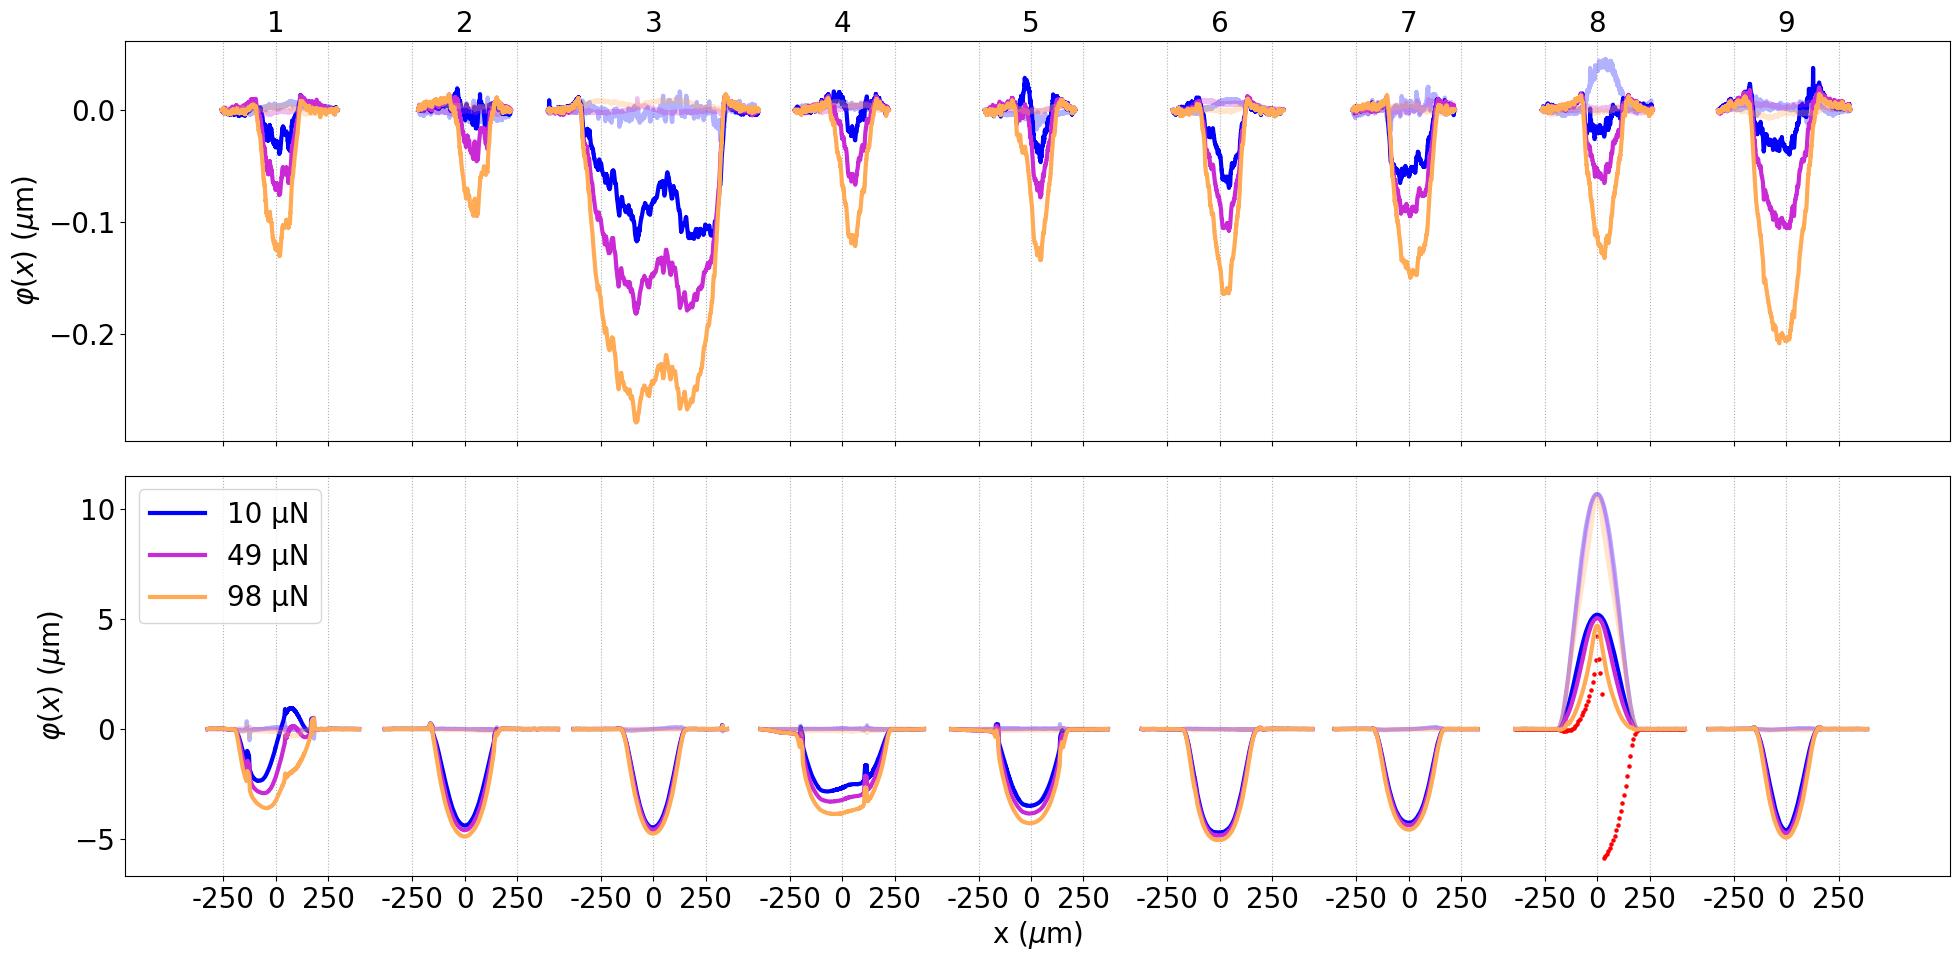

In [7]:
result_arr = [result_waferA, result_waferB]
mem_idxs = [wrong_idx, mem_idx]
example_idxs = [0,2]

figs, axs = plt.subplots(2,1, figsize=(20,10), sharex=True)

rev_idxsA = [1, 5, 10]      # in mg
rev_idxsB = [0,2,5]         # index
x_offset_arr = [150]        # x-offset for plot readability
force_labels = [10, 49, 98] # in muN

for jj, data in enumerate(result_arr):
    x_offset = 150
    for ii, _ in enumerate(mem_idxs[jj]):
        for kk, rev_idx in enumerate(rev_idxsA):
            if len(data[f"Mem {ii}"]["Data"]["Forward"]) < 10:
                forward_scan = np.array(data[f"Mem {ii}"]["Data"]["Forward"][rev_idxsB[kk]])
            else:
                forward_scan = np.array(data[f"Mem {ii}"]["Data"]["Forward"][rev_idx - 1])

            backward_scan = np.array(data[f"Mem {ii}"]["Data"]["Reverse"][kk])
            if jj==1 and ii==0:
                label = f'{force_labels[kk]} μN'
            else: label = None
            axs[jj].plot(forward_scan[:,0] + x_offset,1e-4*forward_scan[:,1], 
                           linewidth=3, color=color_cycle[kk+1], label=label)
            axs[jj].plot(backward_scan[:,0] + x_offset,1e-4*(forward_scan[:,1] - backward_scan[:,1]), 
                        linewidth=3, color=color_cycle[kk+1], alpha=0.3)
            
            # Special membrane (wafer B, membrane #8) which abruptly changed concavity during scan 
            if jj==1 and ii==7 and kk==2:
                filename = folderB + "\%i\%i_%img.csv" % (32,32,15)
                mem_pop = pd.read_csv(filename, skiprows=23)
                data_optimum = np.where(forward_scan[:,1]==np.max(forward_scan[:,1]))
                centered_x = np.array(mem_pop.iloc[:,0]) - float(mem_pop.iloc[data_optimum[0],0]) 
                centered_data = mem_pop
                centered_data.iloc[:,0] = centered_x
                mem_pop = centered_data
                axs[jj].scatter(mem_pop.iloc[::50,0] + x_offset,1e-4*mem_pop.iloc[::50,1], 
                            s=5, color='r')
            
            if kk == 2: 
                x_offset += 900
                if jj==0: x_offset_arr.append(x_offset)
    
    
    axs[jj].set_ylabel(r'$\varphi(x)$ ($\mu$m)')
    

x_range = 250
x_offset_arr_interp = [[x-x_range,x,x+x_range] for x in x_offset_arr[:-1]]
x_offset_arr_interp = np.reshape(x_offset_arr_interp, shape=(np.size(x_offset_arr_interp),))
x_labels_interp = [-x_range,0,x_range]*len(x_offset_arr[:-1])
for jj in range(2):
    axs[jj].set_xticks(x_offset_arr_interp, x_labels_interp)
axs[1].set_xlabel('x ($\mu$m)')
plt.subplot(211)
plt.grid(True, axis='x', linestyle=':')
plt.subplot(212)
plt.grid(True, axis='x', linestyle=':')
plt.legend(loc='upper left')

plt.subplot(211)
for ii in range(9):
    plt.text(x_offset_arr[ii],0.07,f"{ii+1}", horizontalalignment='center')

figs.tight_layout()
